<a href="https://colab.research.google.com/github/Shuaib11-Github/TensorFlow/blob/main/TensorFlow_for__Insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Column transform for features with OneHotEncoder for Categorical and MinMaxScaler for numerical features
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']),
    (MinMaxScaler(), ['age', 'bmi', 'children'])
)

# Split the data into Train and Test data
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer
ct.fit(X_train)

# Transform train and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [4]:
X_train_normal[0]

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.60869565, 0.10734463,
       0.4       ])

In [5]:
# setting random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                             
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['mae'])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs = 200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13340.2441 - mae: 13340.2441
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13275.3584 - mae: 13275.3584
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12908.0469 - mae: 12908.0469
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11644.6846 - mae: 11644.6846
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9423.1426 - mae: 9423.1426
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8049.3794 - mae: 8049.3794
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7825.4937 - mae: 7825.4937
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7657.7920 - mae: 7657.7920
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7489.3555 - mae: 7489.3555
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7305.3931 - mae: 7

In [6]:
# Evaluating the model
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3174.1638 - mae: 3174.1638


[3174.163818359375, 3174.163818359375]

Text(0.5, 0, 'epochs')

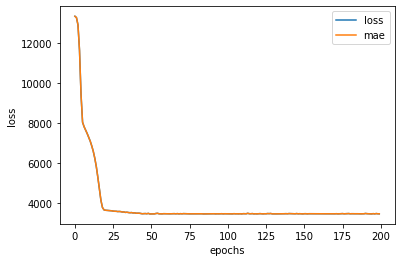

In [7]:
# plot the loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [28]:
model.output_shape, model.input_shape

((None, 1), (None, 11))

In [56]:
X_train_normal[:,8][2]

0.7391304347826086

In [57]:
X_train_normal[:,8].max()

1.0

In [51]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [70]:
import numpy as np

np.where(X_train['age']==64)

(array([ 13,  39, 117, 351, 378, 588, 631, 636, 654, 693, 710, 718, 861,
        876, 968, 972, 974]),)

In [72]:
X_train.iloc[39]

age                64
sex              male
bmi             33.88
children            0
smoker            yes
region      southeast
Name: 420, dtype: object

male      548
female    522
Name: sex, dtype: int64